# Project 2: Sales Performance Analysis
Aim
Analyze sales data to identify trends, relationships, and factors affecting sales performance.

In [25]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and Explore the Dataset

In [2]:
# Load Dataset
original_df = pd.read_csv('sales_data.csv')
df = original_df

In [3]:
# Dataset Preview
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.00,62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.10,-288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24278,IN-2015-JF1541527-42095,4/1/2015,4/5/2015,Standard Class,JF-1541527,Jennifer Ferguson,Consumer,NaN,Liaoyang,...,FUR-TA-3442,Furniture,Tables,"Bevis Wood Table, with Bottom Storage",2614.69,7,0.30,-821.96,203.260,Medium
996,36249,CA-2015-AS10225140-42347,12/9/2015,12/13/2015,Second Class,AS-102251404,Alan Schoenberger,Corporate,94109.0,San Francisco,...,OFF-AP-3371,Office Supplies,Appliances,Belkin 8-Outlet Premiere SurgeMaster II Surge ...,69.48,1,0.00,20.84,12.040,High
997,30517,IN-2014-CK1259592-41929,10/17/2014,10/19/2014,Second Class,CK-1259592,Clytie Kelty,Consumer,NaN,Taupo,...,TEC-CO-3689,Technology,Copiers,"Canon Fax Machine, Laser",636.78,2,0.00,286.50,203.200,Critical
998,1408,MX-2014-SS2014018-41658,1/19/2014,1/26/2014,Standard Class,SS-2014018,Saphhira Shifley,Corporate,NaN,Araguaína,...,FUR-BO-3627,Furniture,Bookcases,"Bush Classic Bookcase, Traditional",2751.20,10,0.00,110.00,203.132,Medium


In [4]:
print('Number of rows and columns in dataset : ')
df.shape

Number of rows and columns in dataset : 


(1000, 24)

In [5]:
print('\nDatatype and null count of dataset : \n')
df.info()


Datatype and null count of dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 

In [6]:
print('\nNumber of null values in each column : \n')
df.isnull().sum()


Number of null values in each column : 



Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64

# Data Cleaning

In [7]:
# Remove duplicates using drop_duplicates()
print('\nNumber of duplicated rows before removing duplicated rows : \n' , df.duplicated().sum())

df = df.drop_duplicates()

print('\nNumber of duplicated rows after removing duplicated rows : \n' , df.duplicated().sum())



Number of duplicated rows before removing duplicated rows : 
 0

Number of duplicated rows after removing duplicated rows : 
 0


In [8]:
# Fill missing values using appropriate strategies like the mean or median
# Postal Code is having 806 missing values therefore filling them with mean

print('\nNumber of missing values in Postal Code : ', df['Postal Code'].isnull().sum())
print('\nPostal Code before filling missing values : \n', df['Postal Code'].head())

df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mean())

print('\n\nPostal Code after filling missing values : \n', df['Postal Code'].head())



Number of missing values in Postal Code :  806

Postal Code before filling missing values : 
 0    73120.0
1        NaN
2        NaN
3        NaN
4        NaN
Name: Postal Code, dtype: float64


Postal Code after filling missing values : 
 0    73120.000000
1    53966.170103
2    53966.170103
3    53966.170103
4    53966.170103
Name: Postal Code, dtype: float64


In [9]:
# Convert the Date column to a datetime object for trend analysis
print('\nDatatypes of date columns  ')
print('Order Date : ',df['Order Date'].dtypes)
print('Ship Date : ',df['Order Date'].dtypes)

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

print('\nConverting datatypes of date columns  ')
print('Order Date : ',df['Order Date'].dtypes)
print('Ship Date : ',df['Ship Date'].dtypes)



Datatypes of date columns  
Order Date :  object
Ship Date :  object

Converting datatypes of date columns  
Order Date :  datetime64[ns]
Ship Date :  datetime64[ns]


# Exploratory Data Analysis

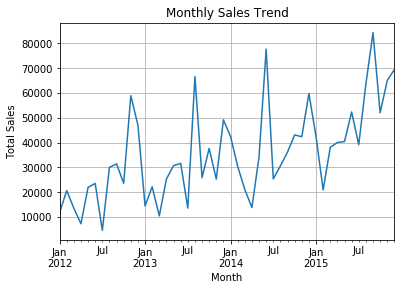

In [10]:
# Time series graphs to observe trends in Sales over time
 
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True) 

plt.show()

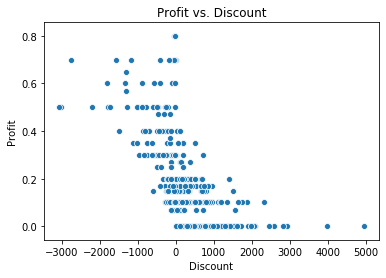

In [11]:
# Scatter plots to study the relationship between Profit and Discount

sns.scatterplot(x='Profit', y='Discount', data=df)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Profit vs. Discount')
plt.show()

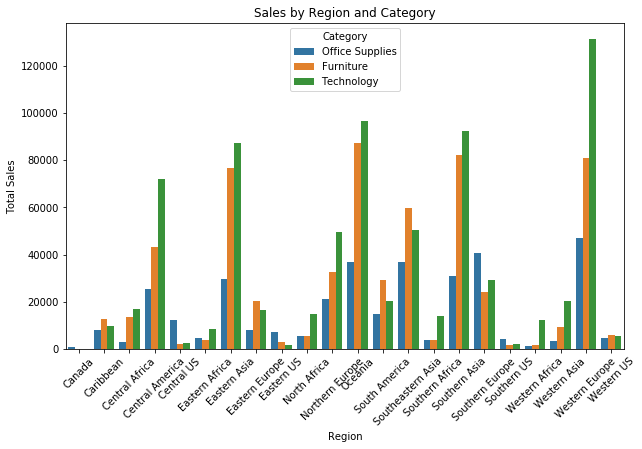

In [12]:
# Visualize sales distribution by Region and Category using bar plots or pie charts


# Calculate total sales by Region and Category
sales_by_region_category = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Bar plot: Sales by Region and Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', hue='Category', data=sales_by_region_category)
plt.title('Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.show()

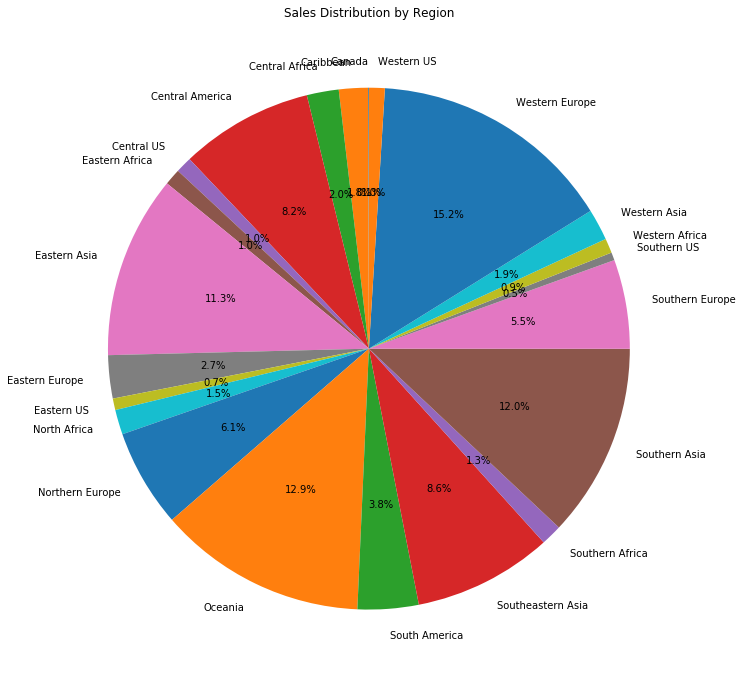

In [13]:
# Pie chart: Sales by Region

plt.figure(figsize=(12, 12))
region_sales = df.groupby('Region')['Sales'].sum()
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Region')
plt.show()

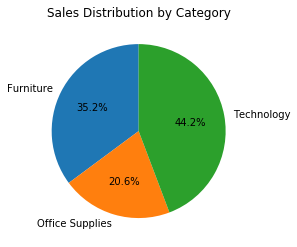

In [14]:
# Pie chart: Sales by Category

category_sales = df.groupby('Category')['Sales'].sum()
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Category')
plt.show()

# Predictive Modeling

In [15]:
# Train a Linear Regression Model to predict Sales using Profit and Discount as features.

In [16]:
# Step 1 : Handling outliers

# Creating new column z-scores
df['z-scores'] = (df['Sales']  -  df['Sales'].mean()) / df['Sales'].std()

# Define bounds
lower_limit = df['Sales'].mean() - 3*df['Sales'].std()
upper_limit = df['Sales'].mean() + 3*df['Sales'].std()

# Find outliers
z_score_outliers = df[(df['Sales'] < lower_limit) | (df['Sales'] > upper_limit)]

print("Outliers in 'Sales' (using Z-scores Technique):")
z_score_outliers


Outliers in 'Sales' (using Z-scores Technique):


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,z-scores
17,12069,ES-2015-PJ1883564-42255,2015-09-08,2015-09-14,Standard Class,PJ-1883564,Patrick Jones,Corporate,53966.170103,Prato,...,Office Supplies,Appliances,"Hoover Stove, Red",7958.58,14,0.0,3979.08,778.32,Low,4.961415
42,25795,IN-2015-VG2180558-42273,2015-09-26,2015-09-28,Second Class,VG-2180558,Vivek Grady,Corporate,53966.170103,Thiruvananthapuram,...,Furniture,Bookcases,"Sauder Classic Bookcase, Traditional",5667.87,13,0.0,2097.03,658.35,Medium,3.142293
43,16681,ES-2013-GT14710139-41621,2013-12-13,2013-12-17,Standard Class,GT-14710139,Greg Tran,Consumer,53966.170103,Huddersfield,...,Technology,Phones,"Motorola Smart Phone, Cordless",5785.02,9,0.0,404.73,656.73,High,3.235325
80,13879,ES-2015-HG1484545-42327,2015-11-19,2015-11-23,Standard Class,HG-1484545,Harry Greene,Consumer,53966.170103,Lille,...,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",5729.35,14,0.1,63.55,572.95,High,3.191116
215,27720,ID-2012-CA1196566-40949,2012-02-10,2012-02-15,Standard Class,CA-1196566,Carol Adams,Corporate,53966.170103,Fuji,...,Technology,Phones,"Samsung Smart Phone, VoIP",6998.64,11,0.0,2939.31,413.80,Medium,4.199098
313,23212,IN-2014-CA1277558-41802,2014-06-12,2014-06-17,Standard Class,CA-1277558,Cynthia Arntzen,Consumer,53966.170103,Kota,...,Technology,Phones,"Apple Smart Phone, with Caller ID",5751.54,9,0.0,2817.99,353.85,Medium,3.208738
419,40336,CA-2014-AB10105140-41991,2014-12-18,2014-12-22,Standard Class,AB-101051402,Adrian Barton,Consumer,48205.000000,Detroit,...,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.74,13,0.0,4946.37,498.70,Medium,6.497390
461,27407,IN-2012-Dp1324027-41223,2012-11-10,2012-11-14,Standard Class,Dp-1324027,Dean percer,Home Office,53966.170103,Suzhou,...,Technology,Phones,"Nokia Smart Phone, Cordless",5725.35,9,0.0,1602.99,302.61,Medium,3.187940
609,25263,IN-2013-CM1216027-41506,2013-08-20,2013-08-24,Standard Class,CM-1216027,Charles McCrossin,Consumer,53966.170103,Beijing,...,Technology,Phones,"Apple Smart Phone, Full Size",5737.50,9,0.0,630.99,261.87,Medium,3.197588
641,30958,IN-2014-AS1063092-41989,2014-12-16,2014-12-20,Standard Class,AS-1063092,Ann Steele,Home Office,53966.170103,Whakatane,...,Technology,Phones,"Motorola Smart Phone, Full Size",6439.80,10,0.0,2447.10,255.36,Medium,3.755306


In [17]:
# Removing outliers
df = df[abs(df['z-scores']) <= 3]
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,z-scores
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.000000,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.00,62.15,40.770,High,-1.182453
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,53966.170103,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.10,-288.77,923.630,Critical,1.587013
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,53966.170103,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.490,Medium,2.751025
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,53966.170103,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.160,Medium,0.938296
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,53966.170103,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.040,Critical,0.891005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24278,IN-2015-JF1541527-42095,2015-04-01,2015-04-05,Standard Class,JF-1541527,Jennifer Ferguson,Consumer,53966.170103,Liaoyang,...,Furniture,Tables,"Bevis Wood Table, with Bottom Storage",2614.69,7,0.30,-821.96,203.260,Medium,0.717670
996,36249,CA-2015-AS10225140-42347,2015-12-09,2015-12-13,Second Class,AS-102251404,Alan Schoenberger,Corporate,94109.000000,San Francisco,...,Office Supplies,Appliances,Belkin 8-Outlet Premiere SurgeMaster II Surge ...,69.48,1,0.00,20.84,12.040,High,-1.303558
997,30517,IN-2014-CK1259592-41929,2014-10-17,2014-10-19,Second Class,CK-1259592,Clytie Kelty,Consumer,53966.170103,Taupo,...,Technology,Copiers,"Canon Fax Machine, Laser",636.78,2,0.00,286.50,203.200,Critical,-0.853048
998,1408,MX-2014-SS2014018-41658,2014-01-19,2014-01-26,Standard Class,SS-2014018,Saphhira Shifley,Corporate,53966.170103,Araguaína,...,Furniture,Bookcases,"Bush Classic Bookcase, Traditional",2751.20,10,0.00,110.00,203.132,Medium,0.826077


In [18]:
# Step 2 : Creating and training model

# Separate features (X) and target variable (y)
X = df[['Discount', 'Profit']] 
y = df['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

Model coefficients: [782.35771544   1.12239536]
Model intercept: 1277.5918427558286


In [33]:
# Step 3 : Print some predictions

Sales_prediction = pd.DataFrame({'Actual Sales':y_test[:10].values , 
                                 'Predicted Sales': np.round(y_pred[:10], 2)})
Sales_prediction

,Actual Sales,Predicted Sales
0,1320.62,1899.31
1,28.40,1292.58
2,1715.06,1770.87
3,1190.52,1478.01
4,2432.16,1932.02
5,2190.95,1766.06
6,2550.00,1678.29
7,2875.77,-332.55
8,4473.00,1629.03
9,840.15,1569.86


In [32]:
new_data = pd.DataFrame({
    'Discount': [0.15, 0.2, 0.1, 0.05, 0.25, 0.18, 0.12, 0.08, 0.3, 0.1],
    'Profit': [50, 45, 60, 55, 35, 58, 62, 42, 40, 65]
}) 
predicted_sales = model.predict(new_data)
print(f"Predicted Sales:") 
pd.DataFrame({'Discount': new_data['Discount'],'Profit': new_data['Profit'], 'Predicted Sales':predicted_sales})

Predicted Sales:


,Discount,Profit,Predicted Sales
0,0.15,50,1451.065268
1,0.20,45,1484.571177
2,0.10,60,1423.171336
3,0.05,55,1378.441473
4,0.25,35,1512.465109
5,0.18,58,1483.515162
6,0.12,62,1441.063281
7,0.08,42,1387.321065
8,0.30,40,1557.194972
9,0.10,65,1428.783312


In [20]:
# Step 4 : Evaluate the Model

print('Mean Absolute Error : ' , mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ' , mean_squared_error(y_test, y_pred))
print('R-squared : ' , r2_score(y_test, y_pred))


Mean Absolute Error :  776.081136716704
Mean Squared Error :  964454.9809636967
R-squared :  0.22768096030612384


In [21]:
# Step 5 : Example data for future predictions
future_data = pd.DataFrame({
    'Discount': [0.1, 0.2, 0.3],
    'Profit': [500, 1000, 1500]
})

# Predict Sales
future_data['Predicted Sales'] = model.predict(future_data)
future_data


,Discount,Profit,Predicted Sales
0,0.1,500,1917.025292
1,0.2,1000,2556.458741
2,0.3,1500,3195.892191


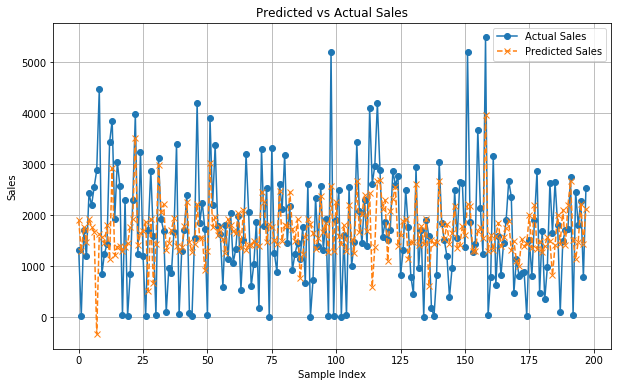

In [22]:
# Step 6 : Visualize Predicted vs Actual Sales

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales', marker='o')
plt.plot(y_pred, label='Predicted Sales', marker='x', linestyle='--')
plt.title("Predicted vs Actual Sales")
plt.xlabel("Sample Index")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()
# Gaps between lines highlight areas of prediction error.

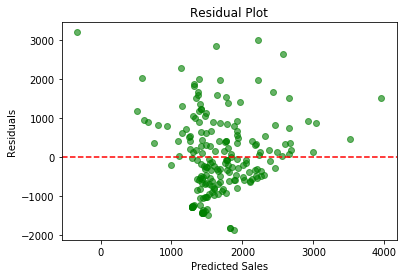

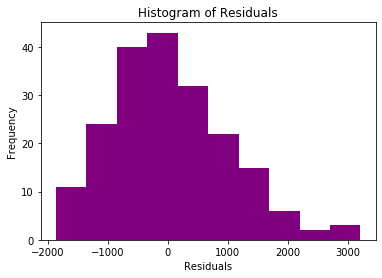

In [23]:
# Step 7 : Visualize residuals

residuals = y_test - y_pred

plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.show()
# Random scatter around the red line (zero) = Model is well-fitted.



plt.hist(residuals,  color='purple')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
# histogram resembles a bell curve therefore the residuals are approximately normal.

In [24]:
# Removing z-score column
df = df.drop('z-scores', axis=1)

Summary

1. Load and Explore the Dataset:
    1. Analysed shape od dataset
    2. Handled missing values in Postal Code column
    3. Handled date dtypes
    
    
    
    
2. Data Cleaning:
    1. Remove duplicates using drop_duplicates()
    2. Fill missing values in Postal Code column using mean
    3. Convert the Date column to a datetime object for trend analysis.




3. Exploratory Data Analysis:


    1. Plot time series graphs to observe trends in Sales over time:
        - Every year Sales increases but only around month of July
        
        
    2. Use scatter plots to study the relationship between Profit and Discount:
        - The overall trend suggests a slight negative correlation between Discount and Profit.This means that as the 
          Discount offered increases, there's a tendency for Profit to decrease slightly.
  
  
    3. Visualize sales distribution by Region and Category 
        1. Bar plots 
            - The sub-category 'Technology' has the highest sales in every region
            - 'Western Asia' has highest sales of every sub-category
        2. Pie charts
            - 'Western Europe' is the highest consuming region
            - Then 'Oceania' followed by 'Southern Asia'
            - Sales by Category follows trend of 'Technology' > 'Furniture' > 'Office Supplies'

    4. Predictive Modeling:
        1. Handled outliers
        2. Creating and training model
        3. Print some predictions
        4. Evaluate the Model
        5. Predict Sales
        6. Visualize Predicted vs Actual Sales
            - Gaps between lines highlight areas of prediction error
        7. Visualize residuals
            - Scatter Plot
                Random scatter around the red line (zero) indicates Model is well-fitted.
            - Histogram
                it resembles a bell curve therefore the residuals are approximately normal.


4. Action Plan

    Action 	
    1. Limit discounts <30% 
    
        Expected Impact : 
            Protect profit margins while maintaining sales volume.
        
    2. Promote high-margin items	
    
        Expected Impact : 
            Increase overall profitability while driving sales.
        
    3. Free shipping on orders > $100:
    
        Expected Impact : 
            Attract higher-value customers and incentivize bulk purchases.
        
    4. Target low-performing regions:	
    
        Expected Impact : 
            Boost sales by focusing campaigns on underperforming areas.

                
Dataset source:
    https://github.com/yannie28/Global-Superstore/blob/master/Global_Superstore(CSV).csv
